In [1]:
#Biblioteca
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import lineStyles
from matplotlib.pyplot import bar
import plotly.express as px

✅ Checklist de Exploração do Dataset Iris

1. **Visão Geral**

In [2]:
iris = load_iris() #Carregando o conjunto de dados Iris
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names']) #Transformando o conjunto em DataFrame Pandas
df_iris['target'] = iris['target']
# Criar nova coluna com os nomes das espécies
df_iris['species'] = df_iris['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [3]:
df_iris.head().style.set_caption("Primeiras 5 linhas do dataset Iris")
# Exibindo as 5 primeiras linhas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.100000,3.500000,1.400000,0.200000,0,Setosa
1,4.900000,3.000000,1.400000,0.200000,0,Setosa
2,4.700000,3.200000,1.300000,0.200000,0,Setosa
3,4.600000,3.100000,1.500000,0.200000,0,Setosa
4,5.000000,3.600000,1.400000,0.200000,0,Setosa


In [4]:
df_iris.sample(5).style.set_caption("5 linhas aleatorias do dataset Iris")# Exibindo 5 amostras aleatorias dos dados

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
75,6.600000,3.000000,4.400000,1.400000,1,Versicolor
72,6.300000,2.500000,4.900000,1.500000,1,Versicolor
92,5.800000,2.600000,4.000000,1.200000,1,Versicolor
77,6.700000,3.000000,5.000000,1.700000,1,Versicolor
10,5.400000,3.700000,1.500000,0.200000,0,Setosa


In [5]:
df_iris.tail().style.set_caption("Ultimas 5 linhas do dataset Iris")#Exibindo as 5 ultimas linhas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.700000,3.000000,5.200000,2.300000,2,Virginica
146,6.300000,2.500000,5.000000,1.900000,2,Virginica
147,6.500000,3.000000,5.200000,2.000000,2,Virginica
148,6.200000,3.400000,5.400000,2.300000,2,Virginica
149,5.900000,3.000000,5.100000,1.800000,2,Virginica


In [6]:
f"O dataset possui {df_iris.shape[0]} linhas e {df_iris.shape[1]} colunas."# Exibe a quantidade de linhas e colunas

'O dataset possui 150 linhas e 6 colunas.'

In [7]:
df_iris.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df_iris.columns]
df_iris.columns
# Exibe os nomes das colunas

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target',
       'species'],
      dtype='object')

In [8]:
df_iris.info()# Informacoes sobre as colunas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


2. **Qualidade dos Dados**

In [9]:
df_iris.isnull().sum()# Verificando se a valores nulos no dataframe

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
species         0
dtype: int64

In [10]:
df_iris.duplicated().sum()# Verifica se a valores duplicados no dataframe

np.int64(1)

In [11]:
df_iris.index[df_iris.index.duplicated()]# Verifica se a valores duplicados na coluna ID no dataframe

Index([], dtype='int64')

In [12]:
df_iris.describe()# Resumo estatistico de colunas numericas

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


3. **Análise de Classes**

In [13]:
#-Distribuicao das especies e contando quantas amostras são Sepal (0), Petal (1) e Target (3).
agrupando_species = df_iris['species'].value_counts()
agrupando_species

species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

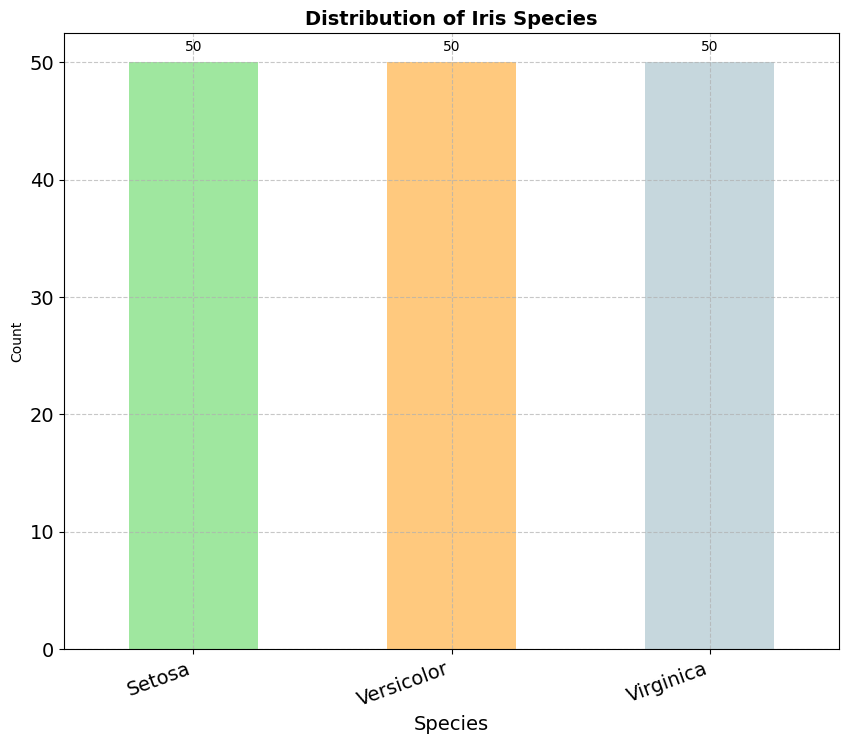

In [14]:
colors = ['#77DD77', '#FFB347', '#AEC6CF']

plt.figure(figsize=(10, 8))
agrupando_species.plot(kind='bar', fontsize=14, color= colors, alpha=0.7)

plt.title('Distribution of Iris Species', fontsize=14, fontweight='bold')
plt.xlabel('Species', fontsize=14)
plt.ylabel('Count')
plt.xticks(rotation=20, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)

for i, v in enumerate(agrupando_species.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=10)

plt.show()
